In [1]:
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.datasets import cifar10
from keras import optimizers
from matplotlib import pyplot as plt

In [2]:
# generate cifar10 data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
# config parameters
num_classes = 10
input_shape = x_train.shape[1:4]
optimizer = optimizers.Adam(lr=0.0003)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:
# convert label to one-hot
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

(32, 32, 3)


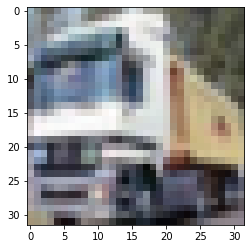

In [5]:
# check data
plt.imshow(x_train[1])
print(x_train[1].shape)

In [6]:
# build model(similar to VGG16, only change the input and output shape)
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
# config optimizer,loss,metrics
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
# check model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [9]:
# train
model.fit(x=x_train,y=one_hot_y_train,batch_size=128,epochs=10)

Epoch 1/10
391/391 [==============================] - 38s 63ms/step - loss: 1.9229 - accuracy: 0.2404
Epoch 2/10
391/391 [==============================] - 24s 60ms/step - loss: 1.4183 - accuracy: 0.4556
Epoch 3/10
391/391 [==============================] - 24s 61ms/step - loss: 1.0458 - accuracy: 0.6246
Epoch 4/10
391/391 [==============================] - 24s 60ms/step - loss: 0.8146 - accuracy: 0.7145
Epoch 5/10
391/391 [==============================] - 23s 60ms/step - loss: 0.6409 - accuracy: 0.7797
Epoch 6/10
391/391 [==============================] - 24s 61ms/step - loss: 0.5139 - accuracy: 0.8227
Epoch 7/10
391/391 [==============================] - 24s 60ms/step - loss: 0.4109 - accuracy: 0.8609
Epoch 8/10
391/391 [==============================] - 23s 60ms/step - loss: 0.3280 - accuracy: 0.8884
Epoch 9/10
391/391 [==============================] - 24s 60ms/step - loss: 0.2661 - accuracy: 0.9106
Epoch 10/10
391/391 [==============================] - 24s 60ms/step - loss: 0.217

In [10]:
# evaluate
print(model.metrics_names)
model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)

['loss', 'accuracy']
20/20 [==============================] - 5s 122ms/step - loss: 0.8368 - accuracy: 0.7742


[0.8368369340896606, 0.7742000222206116]

1/1 [==============================] - 0s 473ms/step
predict class: 5
expected class: 5


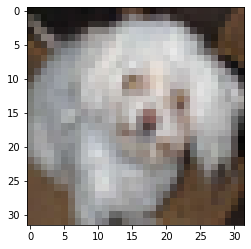

In [11]:
# predict
plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

In [12]:
# save model
model.save("keras-VGG16-cifar10.h5")